# Preprocessing

In [2]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler


# load Dataset

In [4]:
# Cell 2: Load Dataset
df = pd.read_csv(r"C:\Users\Dragon\Downloads\insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Cell 3: Basic Preprocessing
# Encode categorical variables

In [6]:
df_encoded = df.copy()
le = LabelEncoder()
for col in ['sex', 'smoker', 'region']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Scale numeric features
scaler = StandardScaler()
df_encoded[['age', 'bmi', 'charges']] = scaler.fit_transform(df_encoded[['age', 'bmi', 'charges']])

df_encoded.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,0,1,3,0.298584
1,-1.509965,1,0.509621,1,0,2,-0.953689
2,-0.797954,1,0.383307,3,0,2,-0.728675
3,-0.441948,1,-1.305531,0,0,1,0.719843
4,-0.513149,1,-0.292556,0,0,1,-0.776802


In [42]:
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]


# Cell 4: Visualize Target Skewness

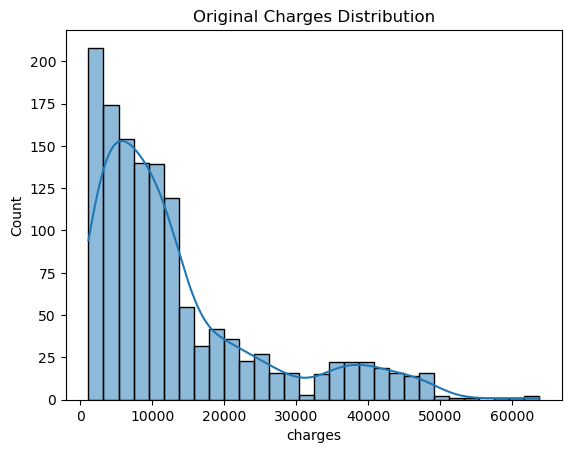

In [8]:
sns.histplot(df['charges'], kde=True)
plt.title("Original Charges Distribution")
plt.show()

# Balancing Techniques on Target (charges)
# Log Transformation

C:\Users\Dragon\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


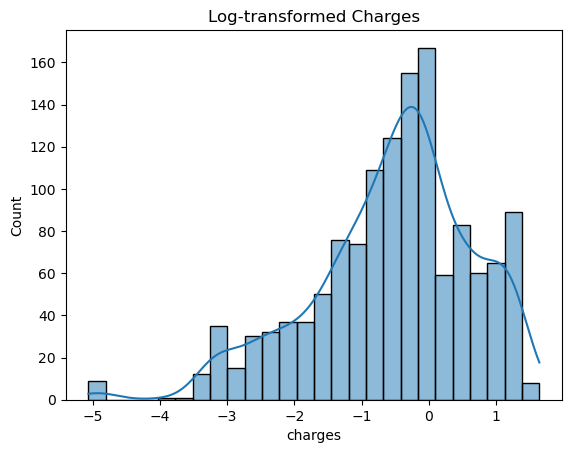

In [10]:
df_log = df_encoded.copy()
df_log['charges'] = np.log1p(df_log['charges'])

sns.histplot(df_log['charges'], kde=True)
plt.title("Log-transformed Charges")
plt.show()


In [45]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔹 Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


🔹 Linear Regression Performance:
MAE: 0.3458357023132987
MSE: 0.22952487683968575
R² Score: 0.7833463107364538


# Square Root Transformation

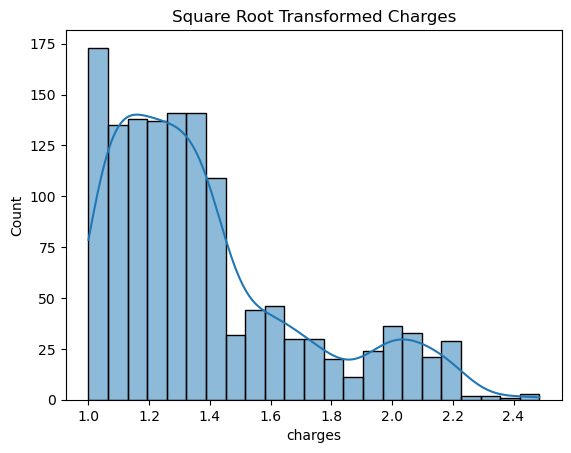

In [12]:
df_sqrt = df_encoded.copy()
df_sqrt['charges'] = np.sqrt(df_sqrt['charges'] - df_sqrt['charges'].min() + 1)

sns.histplot(df_sqrt['charges'], kde=True)
plt.title("Square Root Transformed Charges")
plt.show()


In [49]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest Regressor Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


🔹 Random Forest Regressor Performance:
MAE: 0.20804161781855599
MSE: 0.14289432993094114
R² Score: 0.8651188307749136


# Box-Cox Transformation

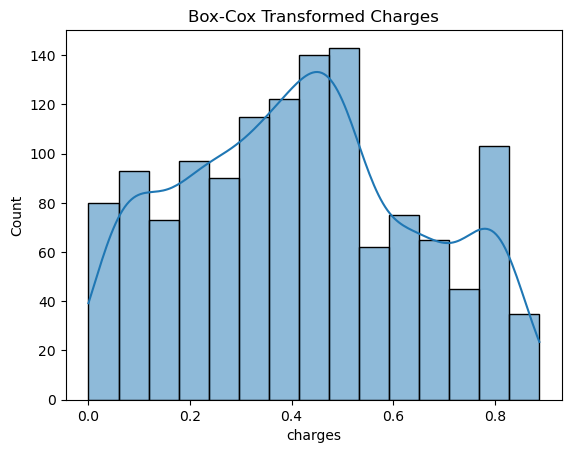

In [51]:
from scipy import stats

df_boxcox = df_encoded.copy()
charges_pos = df_boxcox['charges'] - df_boxcox['charges'].min() + 1
df_boxcox['charges'], _ = stats.boxcox(charges_pos)

sns.histplot(df_boxcox['charges'], kde=True)
plt.title("Box-Cox Transformed Charges")
plt.show()


In [53]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print("🔹 Support Vector Regressor Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("R² Score:", r2_score(y_test, y_pred_svr))


🔹 Support Vector Regressor Performance:
MAE: 0.21428396755530402
MSE: 0.15963597652486208
R² Score: 0.8493160143270352


# Yeo-Johnson Transformation

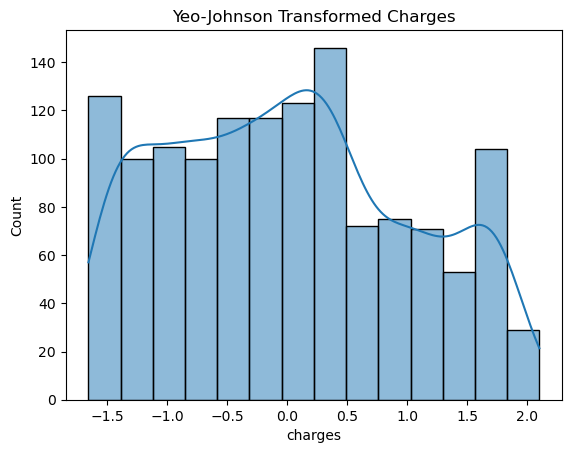

In [16]:
from sklearn.preprocessing import PowerTransformer

df_yeo = df_encoded.copy()
pt = PowerTransformer(method='yeo-johnson')
df_yeo[['charges']] = pt.fit_transform(df_yeo[['charges']])

sns.histplot(df_yeo['charges'], kde=True)
plt.title("Yeo-Johnson Transformed Charges")
plt.show()


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔹 Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


🔹 Linear Regression Performance:
MAE: 0.3458357023132987
MSE: 0.22952487683968575
R² Score: 0.7833463107364538


# Winsorization (outlier clipping)

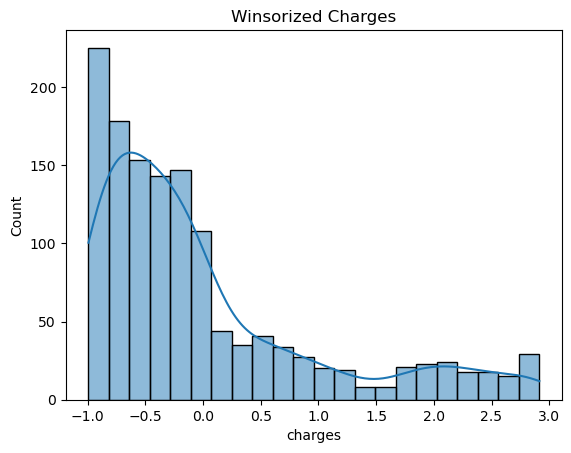

In [18]:
from scipy.stats.mstats import winsorize

df_win = df_encoded.copy()
df_win['charges'] = winsorize(df_win['charges'], limits=[0.01, 0.01])

sns.histplot(df_win['charges'], kde=True)
plt.title("Winsorized Charges")
plt.show()


In [57]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest Regressor Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


🔹 Random Forest Regressor Performance:
MAE: 0.20804161781855599
MSE: 0.14289432993094114
R² Score: 0.8651188307749136


# Quantile Transformation (uniform)

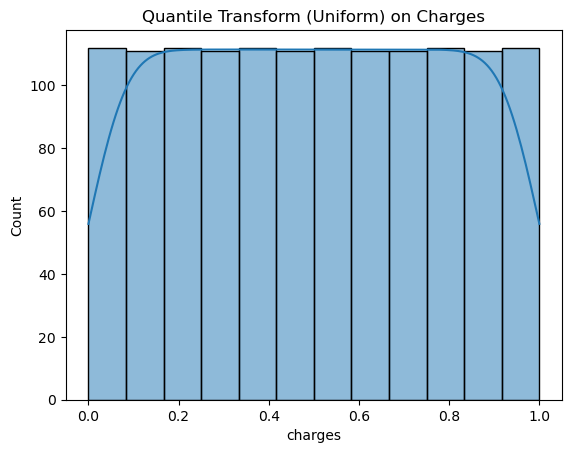

In [20]:
from sklearn.preprocessing import QuantileTransformer

df_qt = df_encoded.copy()
qt = QuantileTransformer(output_distribution='uniform')
df_qt[['charges']] = qt.fit_transform(df_qt[['charges']])

sns.histplot(df_qt['charges'], kde=True)
plt.title("Quantile Transform (Uniform) on Charges")
plt.show()


In [59]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print("🔹 Support Vector Regressor Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("R² Score:", r2_score(y_test, y_pred_svr))


🔹 Support Vector Regressor Performance:
MAE: 0.21428396755530402
MSE: 0.15963597652486208
R² Score: 0.8493160143270352


# Quantile Transformation (normal)

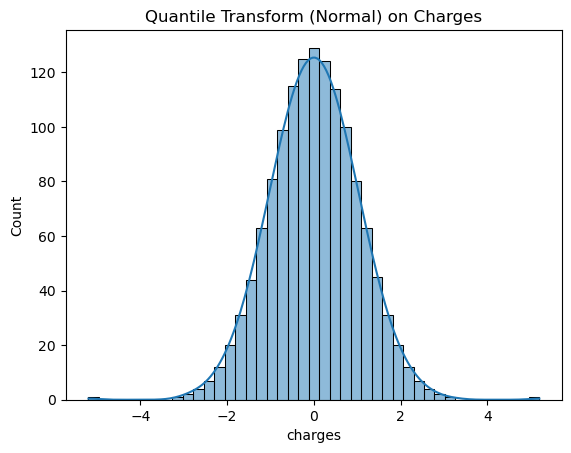

In [22]:
df_qtn = df_encoded.copy()
qt_normal = QuantileTransformer(output_distribution='normal')
df_qtn[['charges']] = qt_normal.fit_transform(df_qtn[['charges']])

sns.histplot(df_qtn['charges'], kde=True)
plt.title("Quantile Transform (Normal) on Charges")
plt.show()


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔹 Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


🔹 Linear Regression Performance:
MAE: 0.3458357023132987
MSE: 0.22952487683968575
R² Score: 0.7833463107364538


# Binning (e.g. categorize charges)

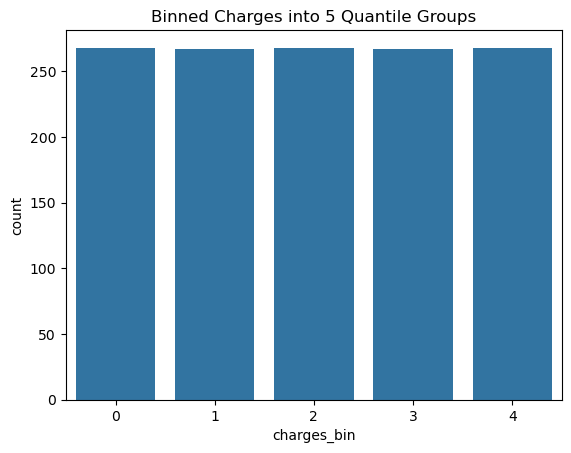

In [24]:
df_binned = df_encoded.copy()
df_binned['charges_bin'] = pd.qcut(df['charges'], q=5, labels=False)

sns.countplot(x='charges_bin', data=df_binned)
plt.title("Binned Charges into 5 Quantile Groups")
plt.show()


In [63]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest Regressor Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


🔹 Random Forest Regressor Performance:
MAE: 0.20804161781855599
MSE: 0.14289432993094114
R² Score: 0.8651188307749136


# SMOGN (Synthetic Minority Oversampling for Regression)

r_index: 100%|######################################################################| 186/186 [00:00<00:00, 314.56it/s]


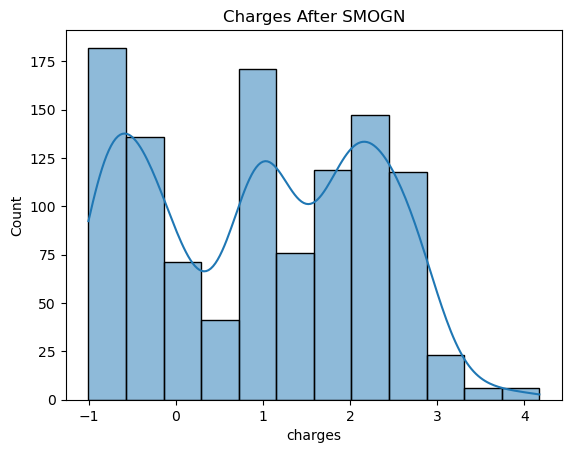

In [26]:
!pip install smogn
!pip install --upgrade smogn


import smogn

df_smogn = smogn.smoter(
    data=df_encoded.copy(),
    y='charges'
)

sns.histplot(df_smogn['charges'], kde=True)
plt.title("Charges After SMOGN")
plt.show()


In [65]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print("🔹 Support Vector Regressor Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("R² Score:", r2_score(y_test, y_pred_svr))


🔹 Support Vector Regressor Performance:
MAE: 0.21428396755530402
MSE: 0.15963597652486208
R² Score: 0.8493160143270352


# KDE-Based Resampling

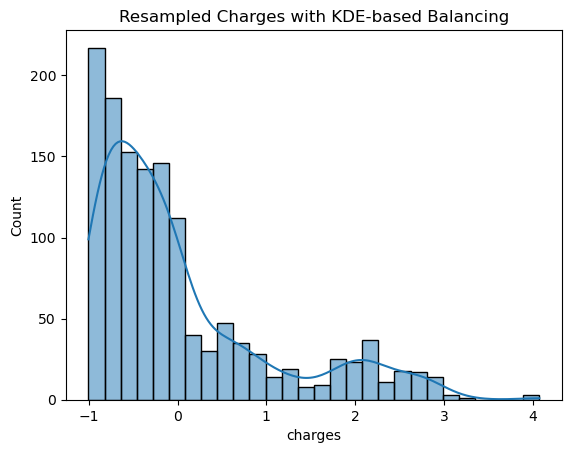

In [40]:
from sklearn.utils import resample

# Split low and high charges
median_val = df_encoded['charges'].median()
low = df_encoded[df_encoded['charges'] <= median_val]
high = df_encoded[df_encoded['charges'] > median_val]

# Oversample the high-cost cases
high_upsampled = resample(high, replace=True, n_samples=len(low), random_state=42)
df_kde = pd.concat([low, high_upsampled])

sns.histplot(df_kde['charges'], kde=True)
plt.title("Resampled Charges with KDE-based Balancing")
plt.show()


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔹 Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


🔹 Linear Regression Performance:
MAE: 0.3458357023132987
MSE: 0.22952487683968575
R² Score: 0.7833463107364538
